# SciPy Samples

module installation

In [1]:
!pip3 install matplotlib

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [2]:
!sudo apt-get install python3-scipy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-scipy is already the newest version (1.1.0-7).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


library import 

In [11]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import stats

curve fitting on semirandom data implementation 

In [4]:
def test_func(x, a, b):
    return a * np.sin(b * x)

seeding the random number generator

In [6]:
np.random.seed(0)

points generation

In [20]:
x_data = np.linspace(-5, 5, num = 50)
y_data = 140 * np.sin(1.5 * x_data) + np.random.normal(size=50)

params, covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])

plot the values finally

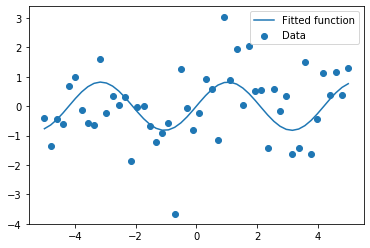

In [19]:
plt.figure(figsize=[6, 4])
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]), label='Fitted function')

plt.legend(loc='best')
plt.show()